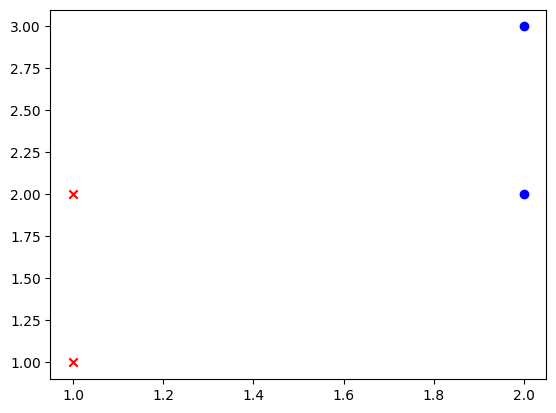

1.2221244018665465
Init Score: 0.5
Final Cost:  0.3136255981217281


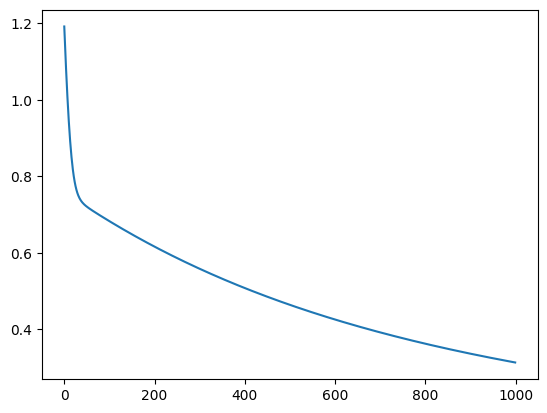

Final Score:  1.0


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
y = np.array([0,0, 1, 1])

plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='x', c='r')
plt.scatter(X[y == 1, 0], X[y == 1, 1], marker='o', c='b')
plt.show()

def logistic_function(z):
    return 1.0 / (1 + np.exp(-z))

def cost_function(X, y, theta):
    m = X.shape[0]
    h = logistic_function(X.dot(theta))
    return -(1/m) * (np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y))

def gradient(X, y, theta):
    h = logistic_function(X.dot(theta))
    return  X.T.dot(h-y)

def gradient_descent(X, y, theta, alpha, num_iters):
    j_history = []
    for i in range(num_iters):
        theta = theta - alpha * gradient(X, y, theta)
        j_history.append(cost_function(X, y, theta))
    return theta, j_history



X = np.c_[np.ones((X.shape[0], 1)), X] # Add a column of ones to X (intercept term)
theta = np.random.rand(X.shape[1])

init_cost = cost_function(X, y, theta)
print(init_cost)
init_score = accuracy_score(y, logistic_function(X.dot(theta)) > 0.5)
print("Init Score:",init_score)

theta, j_history = gradient_descent(X, y, theta, 0.01, 1000)

print("Final Cost: ", j_history[-1])

plt.plot(j_history)
plt.show()

print("Final Score: ", accuracy_score(y, logistic_function(X.dot(theta)) > 0.5))





In [12]:
theta

array([-2.93065802,  1.83121122,  0.25119976])

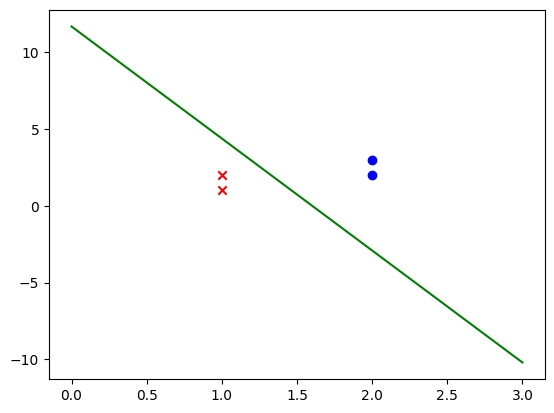

In [13]:
# Draw the decision boundary
x1 = np.linspace(0, 3, 100)
x2 = -(theta[0] + theta[1]*x1) / theta[2]
plt.plot(x1, x2, c='g')
plt.scatter(X[y == 0, 1], X[y == 0, 2], marker='x', c='r')
plt.scatter(X[y == 1, 1], X[y == 1, 2], marker='o', c='b')
plt.show()

In [14]:
# use sklearn
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X[:,1:], y)
print(clf.intercept_, clf.coef_)
print(clf.score(X[:,1:], y))


[-2.18825821] [[0.69860464 0.57015216]]
1.0


# Mushroom Data Classification

In [16]:
!pip install kagglehub --upgrade

^C


Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/63.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/63.0 kB ? eta -:--:--
   ------ --------------------------------- 10.2/63.0 kB ? eta -:--:--
   ------------------- -------------------- 30.7/63.0 kB 435.7 kB/s eta 0:00:01
   ------------------------- -------------- 41.0/63.0 kB 393.8 kB/s eta 0:00:01
   ---------------------------------------- 63.0/63.0 kB 422.4 kB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.6
    Uninstalling kagglehub-0.3.6:
      Successfully uninstalled kagglehub-0.3.6


In [4]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("uciml/mushroom-classification")

print("Path to dataset files:", path)

# copy in windows
!copy $path ./data

Path to dataset files: C:\Users\engsm\.cache\kagglehub\datasets\uciml\mushroom-classification\versions\1
C:\Users\engsm\.cache\kagglehub\datasets\uciml\mushroom-classification\versions\1\mushrooms.csv
        1 file(s) copied.


In [5]:
df = pd.read_csv("data/mushrooms.csv")
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
